In [1]:
import numpy as np
import pandas as pd
print("Package Installed")

Package Installed


In [2]:
dataset=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','MSG'])
dataset

,label,MSG
0,Ham,"Go until jurong point, crazy.. Available only ..."
1,Ham,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Ham,U dun say so early hor... U c already then say...
4,Ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,Spam,This is the 2nd time we have tried 2 contact u...
5568,Ham,Will ü b going to esplanade fr home?
5569,Ham,"Pity, * was in mood for that. So...any other s..."
5570,Ham,The guy did some bitching but I acted like i'd...


In [3]:
dataset.info()          #no.of entries starting 0 to 5572 and column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   MSG     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
dataset.describe()    

,label,MSG
count,5572,5572
unique,2,5169
top,Ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
dataset['label']=dataset['label'].map({"Ham":0,"Spam":1})
dataset                                      
#Ham=0    Spam=1                                      

,label,MSG
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Package Installed")

Package Installed


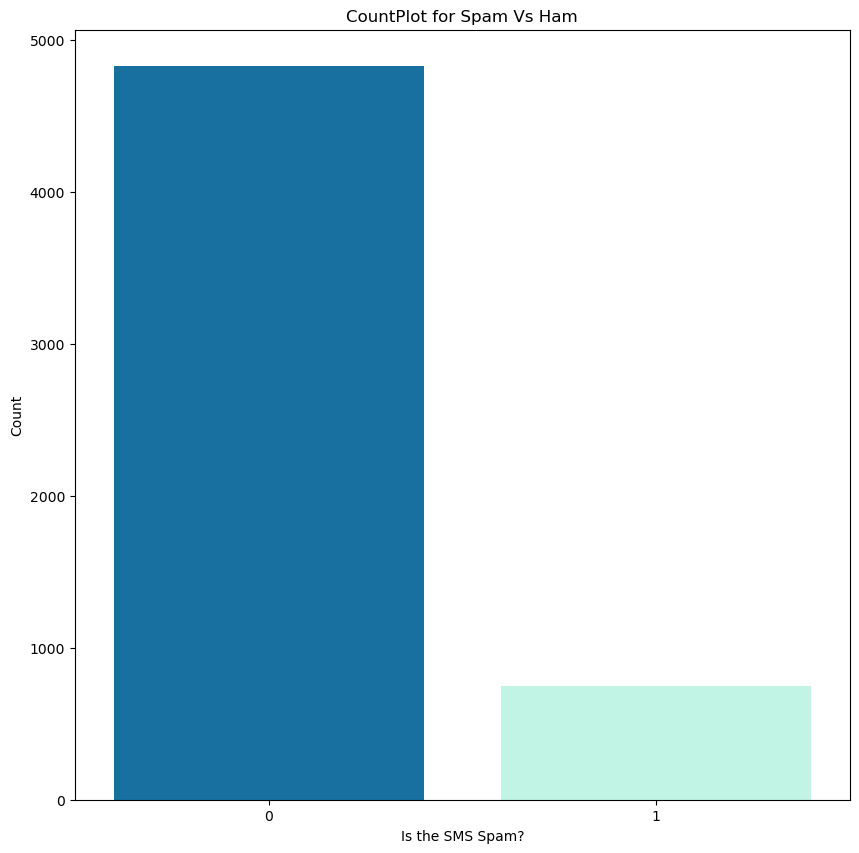

In [7]:
#Countplot for Spam vs Ham as it is imbalanced dataset   [VISUALISATION]
plt.figure(figsize=(10,10))
Countplt=sns.countplot(x="label",palette=["#0077b6", "#B8FDE7"],data=dataset)
P=plt.title("CountPlot for Spam Vs Ham")
P=plt.xlabel("Is the SMS Spam?")
P=plt.ylabel("Count")

#It is imbalanced dataset as there is a vast difference

In [8]:
#Handling imbalanced dataset
Only_Spam=dataset[dataset['label']==1]
Only_Spam    #Only Spams are printed

,label,MSG
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [9]:
Only_Ham=len(dataset)-len(Only_Spam)
Only_Ham

4825

In [10]:
print("No of Spam SMS are : ",len(Only_Spam))
print("No of Ham SMS are : ",Only_Ham)

No of Spam SMS are :  747
No of Ham SMS are :  4825


In [11]:
Count=int((dataset.shape[0]-Only_Spam.shape[0])/Only_Spam.shape[0])
Count

6

In [12]:
for i in range(0,Count-1):
    dataset=pd.concat([dataset, Only_Spam])
dataset.shape   

(9307, 2)

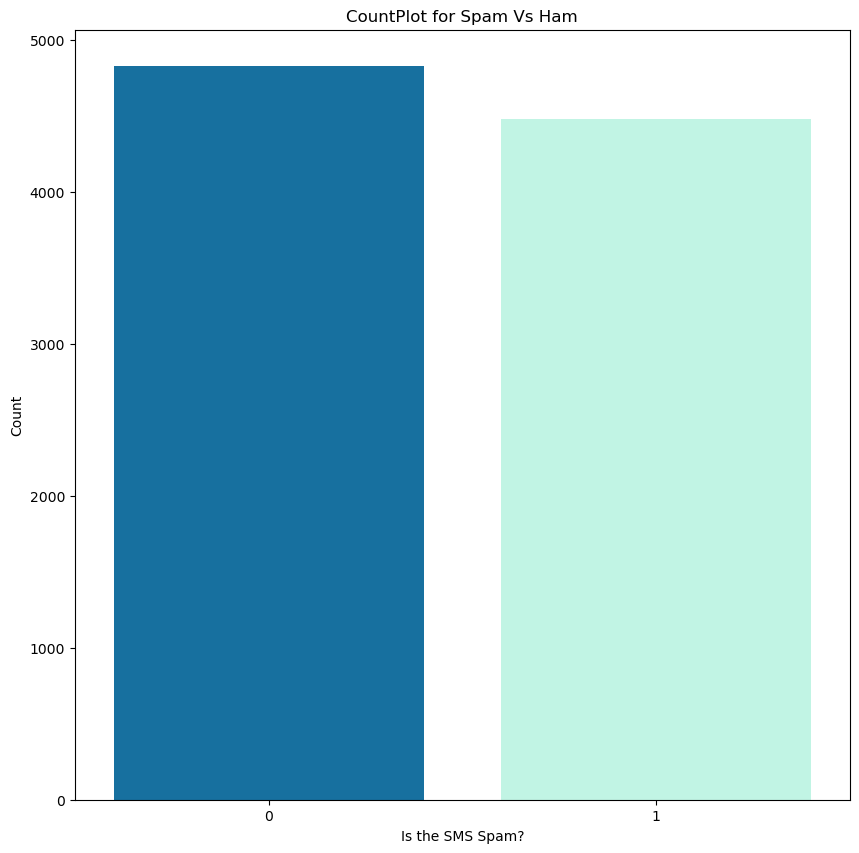

In [13]:
#Countplot for Spam vs Ham as it is balanced dataset   [VISUALISATION]
plt.figure(figsize=(10,10))
Countplt=sns.countplot(x="label",palette=["#0077b6", "#B8FDE7"],data=dataset)
P=plt.title("CountPlot for Spam Vs Ham")
P=plt.xlabel("Is the SMS Spam?")
P=plt.ylabel("Count")

#It is balanced dataset

In [14]:
#Creating new feature Word_Count
dataset['Word_Count']=dataset['MSG'].apply(lambda x:len(x.split()))
dataset
#It'll help to know which among the Spam or Ham are more

,label,MSG,Word_Count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


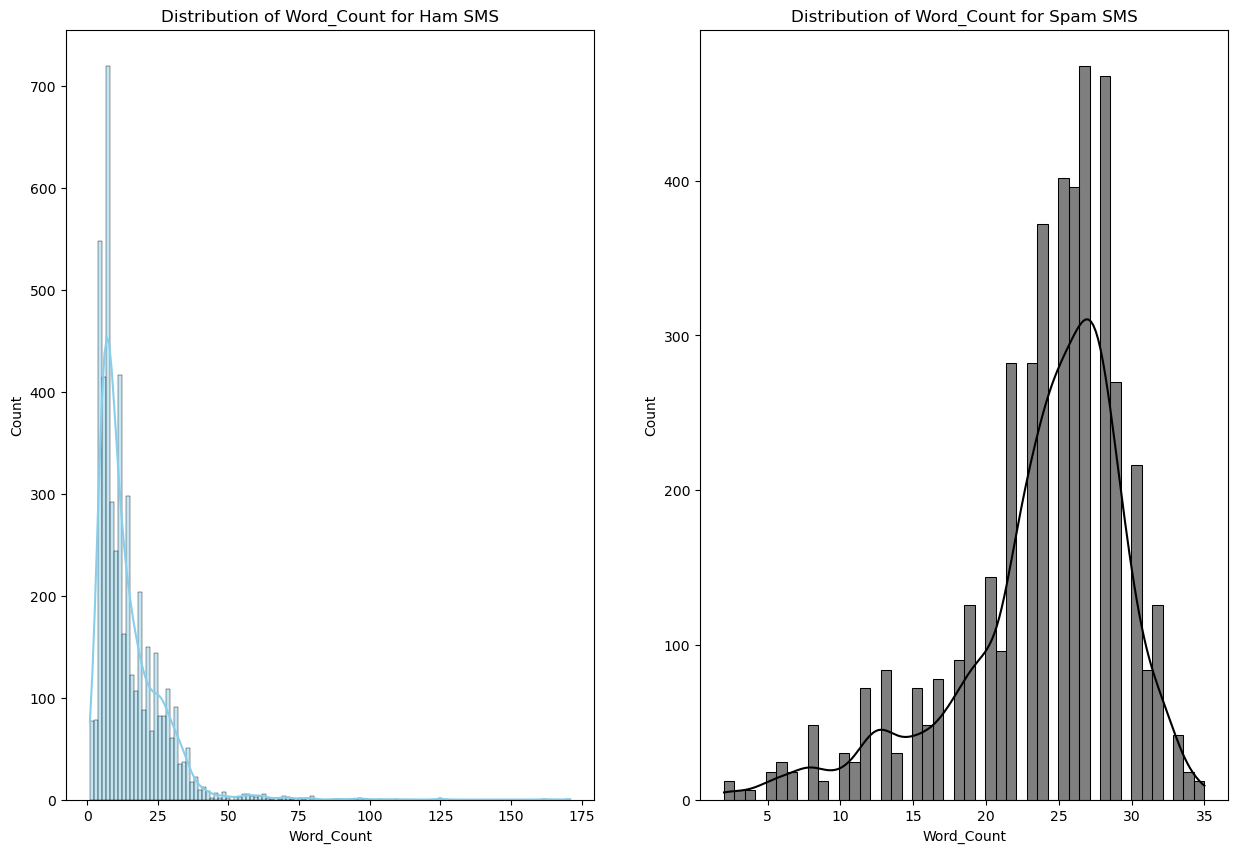

In [15]:
plt.figure(figsize=(15,10))

#Row:1,Column:1
plt.subplot(1,2,1)
HeatMap=sns.histplot(dataset[dataset['label']==0].Word_Count,color="skyblue",kde=True)
P=plt.title("Distribution of Word_Count for Ham SMS")

#Row:1,Column:2
plt.subplot(1,2,2)
HeatMap=sns.histplot(dataset[dataset['label']==1].Word_Count,color="black",kde=True)
P=plt.title("Distribution of Word_Count for Spam SMS")

plt.tight_layout     #used for padding and organising
plt.show()

In [16]:
#Creating a new feature of containing Currency Symbols
def currency_present(data):
    currency_symbols={'$','€','£','₹','¥','₱','₩','₦','₺','₫','₭'}
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [17]:
dataset['Contains_CurrencySymbol']=dataset['MSG'].apply(currency_present)
dataset

,label,MSG,Word_Count,Contains_CurrencySymbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


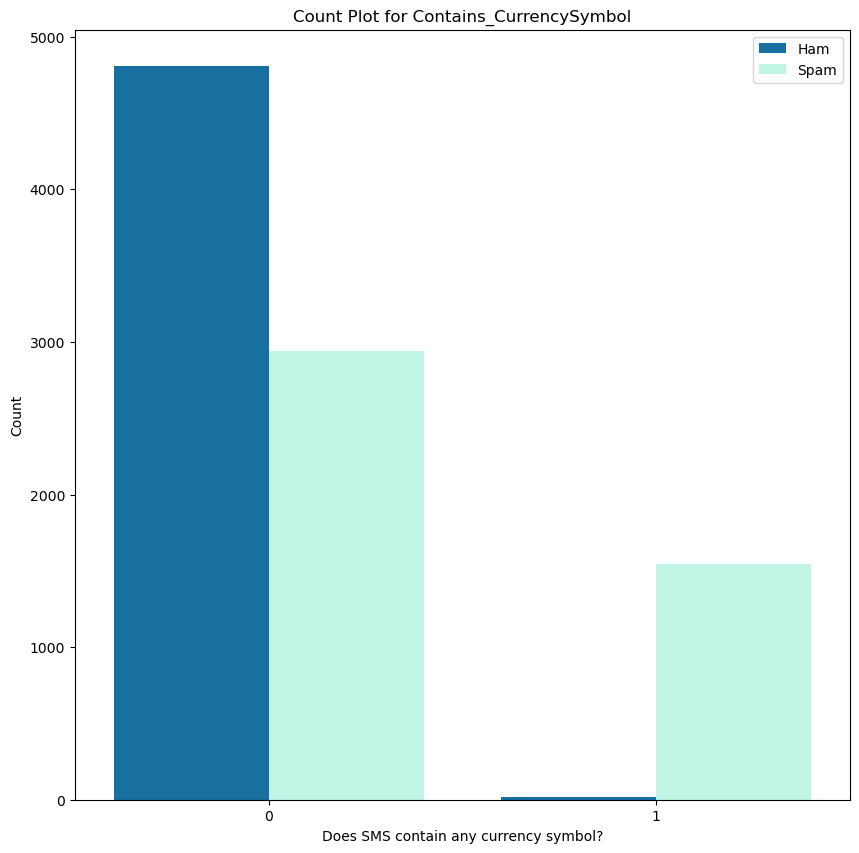

In [18]:
#Plotting a Graph for Contains_CurrencySymbol [VISUALISATION]
plt.figure(figsize=(10,10))
CountPlt=sns.countplot(x='Contains_CurrencySymbol',palette=["#0077b6", "#B8FDE7"],data=dataset, hue='label')
P=plt.title("Count Plot for Contains_CurrencySymbol")
P=plt.xlabel("Does SMS contain any currency symbol?")
P=plt.ylabel("Count")
P=plt.legend(labels=["Ham","Spam"])

In [19]:
#Creating a new feature of Containing Numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:           #ord used to get ascii value of numbers
            return 1
    return 0    

In [20]:
dataset["Contains_Numbers"]=dataset["MSG"].apply(number)
dataset

,label,MSG,Word_Count,Contains_CurrencySymbol,Contains_Numbers
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


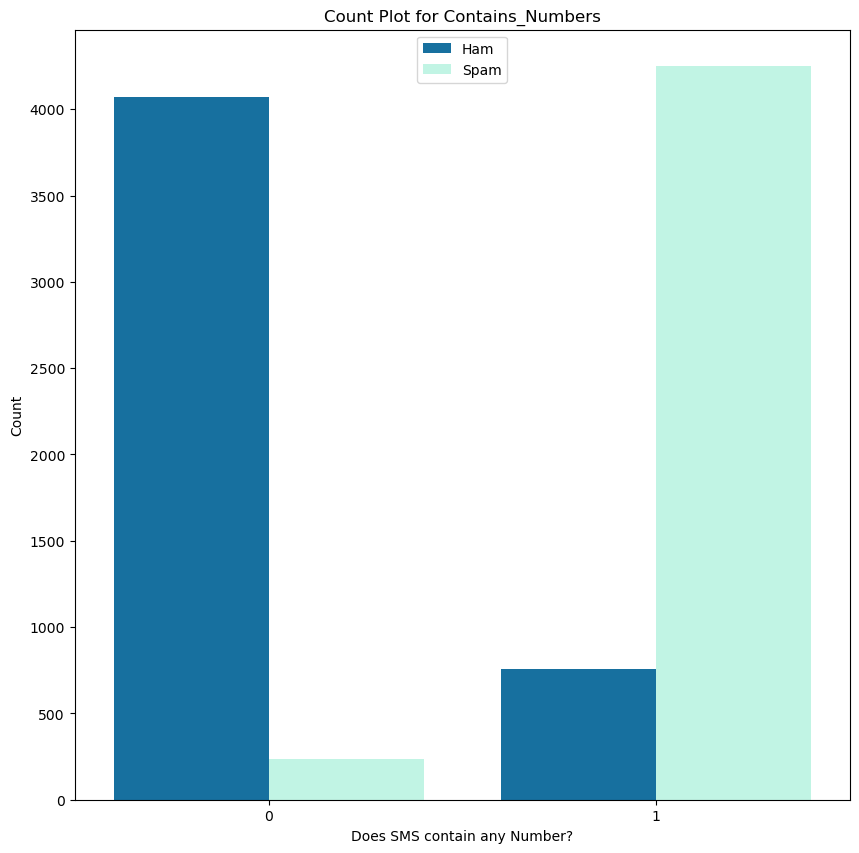

In [21]:
#Plotting a Graph for Contains_Numbers    [VISUALISATION]
plt.figure(figsize=(10,10))
CountPlt=sns.countplot(x='Contains_Numbers',data=dataset,palette=["#0077b6", "#B8FDE7"], hue='label')
P=plt.title("Count Plot for Contains_Numbers")
P=plt.xlabel("Does SMS contain any Number?")
P=plt.ylabel("Count")
P=plt.legend(labels=["Ham","Spam"],loc=9)       #loc is used for positioning scale at desired location

In [22]:
#Data Cleaning to make our data structured
import nltk
import re
#nltk.download("stopwords")
#nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [23]:
corpus= []
WordNetLem=WordNetLemmatizer()


In [24]:
for sms in list(dataset.MSG):
    MSG=re.sub(pattern="[^a-zA-Z]",repl=' ',string=sms)  #used to filter special characters and numbers
    MSG=MSG.lower()
    words=MSG.split()
    Filtered_Words=[word for word in words if word not in set(stopwords.words("english"))]
    Lemm_Words=[WordNetLem.lemmatize(word) for word in Filtered_Words]
    MSG=" ".join(Lemm_Words)
    corpus.append(MSG) 

In [25]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [26]:
#Creating the flag of words model
from sklearn.feature_extraction.text import TfidfVectorizer    #TermFrequenceyInverseDocumentFrequency Vectorizer is imported
TfidfVec=TfidfVectorizer(max_features=500)
Vectors=TfidfVec.fit_transform(corpus).toarray()
feature_names = TfidfVec.get_feature_names_out()


In [27]:
X=pd.DataFrame(Vectors,columns=feature_names)
Y=dataset['label']

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
print("Package Installed")

Package Installed


In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.72412,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.557154,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [30]:
#Naive Base Model
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
CV=cross_val_score(MNB,X,Y,scoring='f1',cv=10)
print(MNB)
print(CV)
print(round(CV.mean(),3))
print(round(CV.std(),3))

MultinomialNB()
[0.93986637 0.94314381 0.94369369 0.94983278 0.9452514  0.93854749
 0.93406593 0.94394619 0.9415656  0.94606742]
0.943
0.004


In [31]:
MNB.fit(X_train,Y_train)
Y_Pred=MNB.predict(X_test)

In [32]:
print(classification_report(Y_test,Y_Pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [33]:
ConfuMat=confusion_matrix(Y_test,Y_Pred)
ConfuMat


array([[905,  54],
       [ 56, 847]], dtype=int64)

In [34]:
Accu_Score=accuracy_score(Y_test,Y_Pred)
print(Accu_Score)

0.9409237379162191


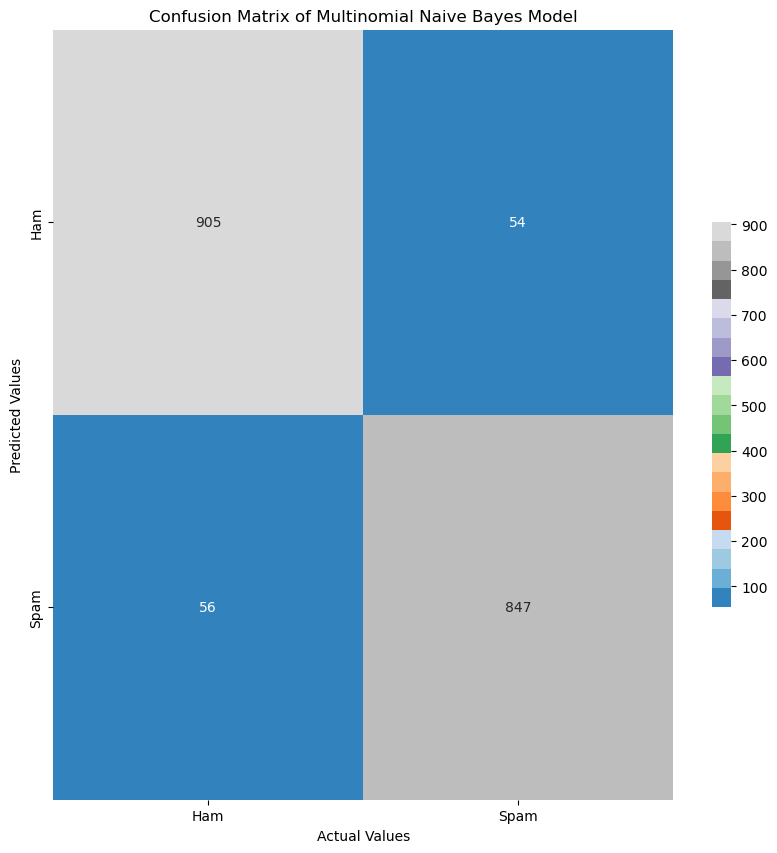

In [35]:
plt.figure(figsize=(10,10))
axis_labels=['Ham','Spam']
g=sns.heatmap(data=ConfuMat,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={"shrink":0.5},cmap="tab20c")
P=plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
P=plt.xlabel("Actual Values")
P=plt.ylabel("Predicted Values")

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
CV1=cross_val_score(DT,X,Y,scoring='f1',cv=10)
print(round(CV1.mean(),3))
print(round(CV1.mean(),3))


0.98
0.98


In [37]:
DT.fit(X_train,Y_train)
Y_Pred1=DT.predict(X_test)

In [38]:
print(classification_report(Y_test,Y_Pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.96      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [39]:
ConfuMat=confusion_matrix(Y_test,Y_Pred1)
ConfuMat

array([[926,  33],
       [  4, 899]], dtype=int64)

In [40]:
Accu_Score=accuracy_score(Y_test,Y_Pred1)
print(Accu_Score)

0.9801288936627283


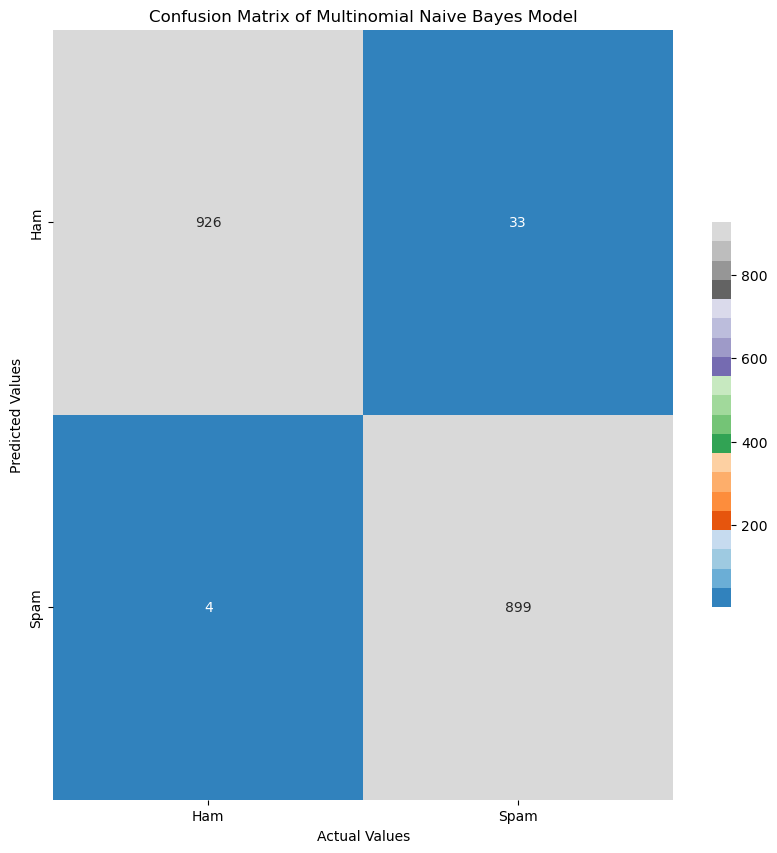

In [41]:
plt.figure(figsize=(10,10))
axis_labels=['Ham','Spam']
g=sns.heatmap(data=ConfuMat,xticklabels=axis_labels,yticklabels=axis_labels,annot=True,fmt='g',cbar_kws={"shrink":0.5},cmap="tab20c")
P=plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
P=plt.xlabel("Actual Values")
P=plt.ylabel("Predicted Values")

In [42]:
def Predict_Spam(sms):
    MSG=re.sub(pattern="[^a-zA-Z]",repl=' ',string=sms)  #used to filter special characters and numbers
    MSG=MSG.lower()
    words=MSG.split()
    Filtered_Words=[word for word in words if word not in set(stopwords.words("english"))]
    Lemm_Words=[WordNetLem.lemmatize(word) for word in Filtered_Words]
    MSG=" ".join(Lemm_Words)
    temp=TfidfVec.transform([MSG]).toarray()
    return MNB.predict(temp)

In [43]:
import warnings
warnings.filterwarnings("ignore")  

In [44]:
#Prediction 1:Gift Card text message
sample="Congratulations! You've won a $1000 gift card. Text back 'CLAIM' to receive it."
  
if Predict_Spam(sample):
    print("This is SPAM Message.")
else:
    print("This is a HAM Message[normal].")



This is SPAM Message.


In [45]:
#Prediction 2:Checking whether that casual message is spam or ham
sample="Hi! how are you"
  
if Predict_Spam(sample):
    print("This is SPAM Message.")
else:
    print("This is a HAM Message[normal].")



This is a HAM Message[normal].
